## Exploring the Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
 
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.semi_supervised import LabelSpreading
from utils import visualize_silhouette
from typing import Tuple

In [95]:
# Load the dataset
df = pd.read_csv('../dat/online_shoppers_intention.csv.gz')

# convert the header into lower case 
df.columns = [col.lower() for col in list(df.columns)]

# Display the first five records
df.head(n=20)

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [96]:
# Display the number of records and number of columns/features
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns/features')

The dataset has 12330 rows and 18 columns/features


In [97]:
# Display feature sets and their respective datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           12330 non-null  int64  
 1   administrative_duration  12330 non-null  float64
 2   informational            12330 non-null  int64  
 3   informational_duration   12330 non-null  float64
 4   productrelated           12330 non-null  int64  
 5   productrelated_duration  12330 non-null  float64
 6   bouncerates              12330 non-null  float64
 7   exitrates                12330 non-null  float64
 8   pagevalues               12330 non-null  float64
 9   specialday               12330 non-null  float64
 10  month                    12330 non-null  object 
 11  operatingsystems         12330 non-null  int64  
 12  browser                  12330 non-null  int64  
 13  region                   12330 non-null  int64  
 14  traffictype           

In [98]:
# Display 
df.describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [99]:
print("# of unique values per feature/column: ")
print("----------------------------------------" )

df.nunique()

# of unique values per feature/column: 
----------------------------------------


administrative               27
administrative_duration    3335
informational                17
informational_duration     1258
productrelated              311
productrelated_duration    9551
bouncerates                1872
exitrates                  4777
pagevalues                 2704
specialday                    6
month                        10
operatingsystems              8
browser                      13
region                        9
traffictype                  20
visitortype                   3
weekend                       2
revenue                       2
dtype: int64

In [100]:
# Display count of NaN values for each feature set 

print("No missing values")
print("-------------------")
df.isna().sum()

No missing values
-------------------


administrative             0
administrative_duration    0
informational              0
informational_duration     0
productrelated             0
productrelated_duration    0
bouncerates                0
exitrates                  0
pagevalues                 0
specialday                 0
month                      0
operatingsystems           0
browser                    0
region                     0
traffictype                0
visitortype                0
weekend                    0
revenue                    0
dtype: int64

## Implementation: Data Exploration

- The total number of count of records in each feature set


In [101]:

# Total number of records per feature/column
for columns in df.select_dtypes(['bool', 'object', 'int64', 'float64']).columns:
    print(f'Column/Feature :  {columns} \n {df[columns].value_counts()}') 
    
    

Column/Feature :  administrative 
 0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: administrative, dtype: int64
Column/Feature :  administrative_duration 
 0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: administrative_duration, Length: 3335, dtype: int64
Column/Feature :  informational 
 0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: informational, dtype: int64
Column/Feature :  informational_duration 
 0.00      9925
9.00     

#### Observation

- Most visitors are returning visitors ( 10,551 )
- Most buys/site surfers are done on weekdays ( 9,462 )
- Traffic type 2 is most dominant one ( 3,913 )
- Most dominant region is region 1 ( 4780 )
- Most visitors surf with browser 2 ( 7961 )
- Most used operating system is 2 ( 6601 )
- Most visitors purchase or window shop in the month of May

### Feature set Exploration

- administrative  : categorical
- administrative_duration : categorical
- informational : categorical
- informational_duration : categorical
- productrelated : categorical
- productrelated_duration : continuous/numerical
- bouncerates : continuous/numerical
- exitrates : continuous/numerical
- pagevalues : continuous/numerical
- specialday : continuous/numerical
- month : Feb, Mar, Apr, May, June, Jul, Aug, Sep, Oct, Nov, Dec
- operatingsystems : categorical
- browser : categorical
- region : categorical
- traffictype : continuous/numerical
- visitortype : New_Visitor, Returning_Visitor, Other
- weekend : Boolean

In [102]:
# splitting the data into training and testing based on the feature 'month'
training = df[df['month'].isin(['June', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])]
testing = df[df['month'].isin(['Feb', 'Mar'])]
print(f'Training shape: {training.shape}')
print(f'Testing shape: {testing.shape}')

Training shape: (6875, 18)
Testing shape: (2091, 18)


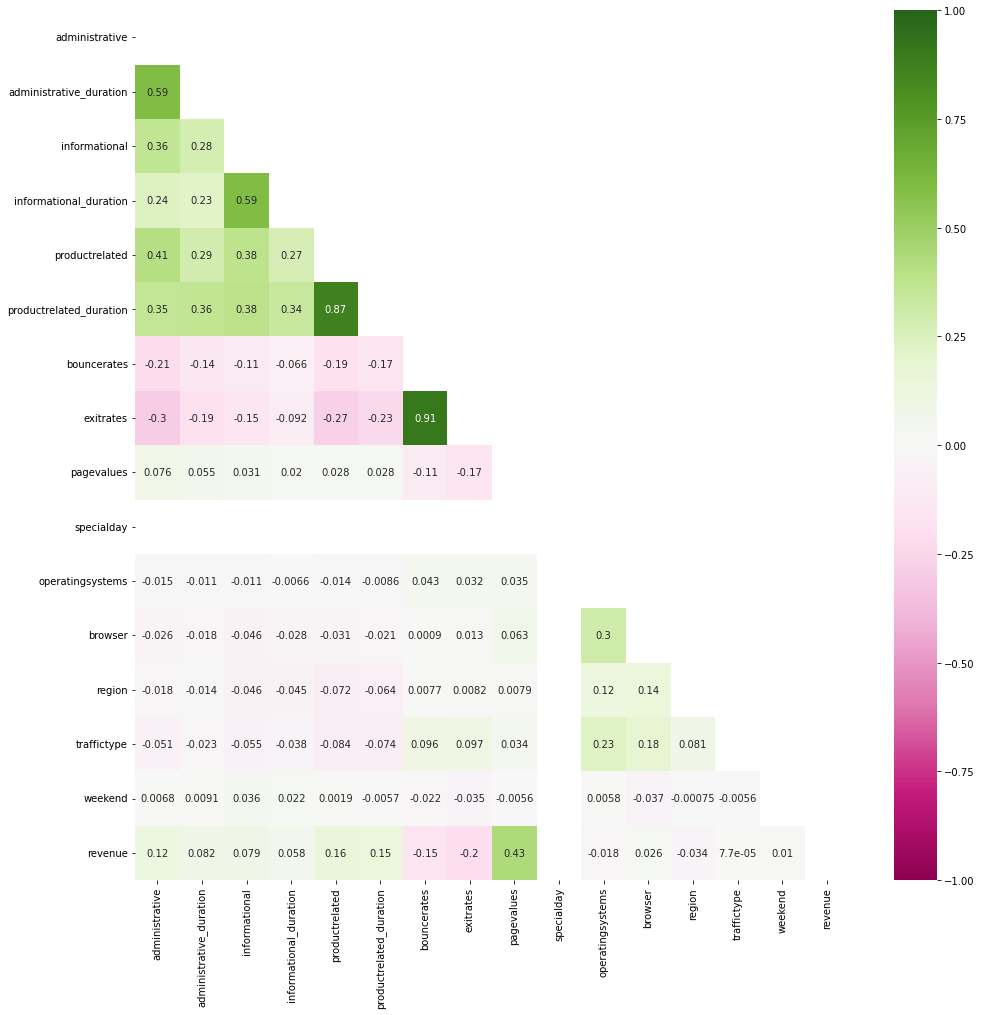

In [103]:
# check for highly correlated features
plt.figure(figsize=(16, 16))

# creating mask
mask = np.triu(np.ones_like(training.corr()))
sns.heatmap(training.corr(), vmin=-1, vmax=1, cmap='PiYG', annot=True, mask=mask);

### Observation 

- exitrates looks to have the highest correlation  (i.e. with correlation coefficient of 0.91 ) 
- productrelated_duration have high correlation (i.e.with correlation coefficient of 0.87 )
- pagevalues is negatively correlated ( i.e. low correlation with correlation coefficient of -0.17 )

In [104]:
# convert months into Number 
months = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

converted = {a: i+1 for i, a in enumerate(months)}

df['month'] = df['month'].replace(converted)

In [105]:
# Split the data into train and test
train_df = df[df.month >= 6]
test_df = df[df.month.isin([2,3])]

In [106]:
# Features 
categorical = ['browser', 'region', 'traffictype', 'visitortype', 'weekend', 'operatingsystems']

numerical = [i for i in df.columns if (i not in categorical) & (i!='revenue') ]
print(numerical)

['administrative', 'administrative_duration', 'informational', 'informational_duration', 'productrelated', 'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues', 'specialday', 'month']


In [107]:
train_df.shape, test_df.shape

((6875, 18), (2091, 18))

                                    
 Categorical Feature counts                                    


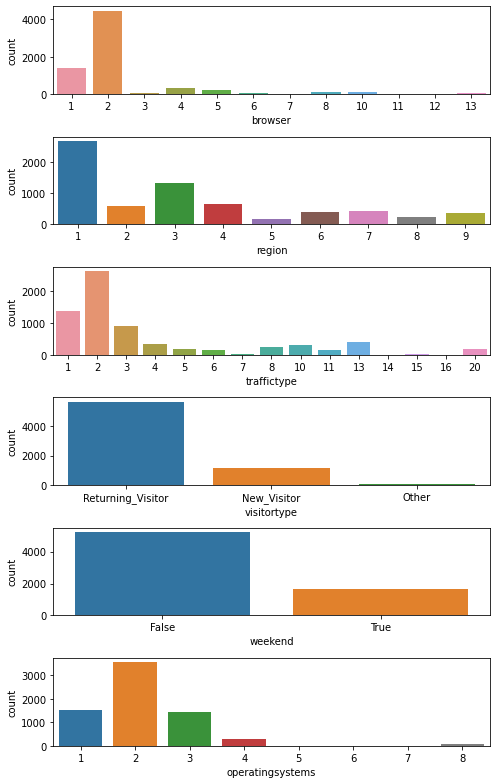

In [108]:
print('\n Categorical Feature counts'.center(100))

plt.figure(figsize=(7,11)) 

for i in range(len(categorical)):
    plt.subplot(6,1,i+1)
    sns.countplot(train_df[categorical[i]])
plt.tight_layout();


                                    
 Numerical Feature Analysis                                    


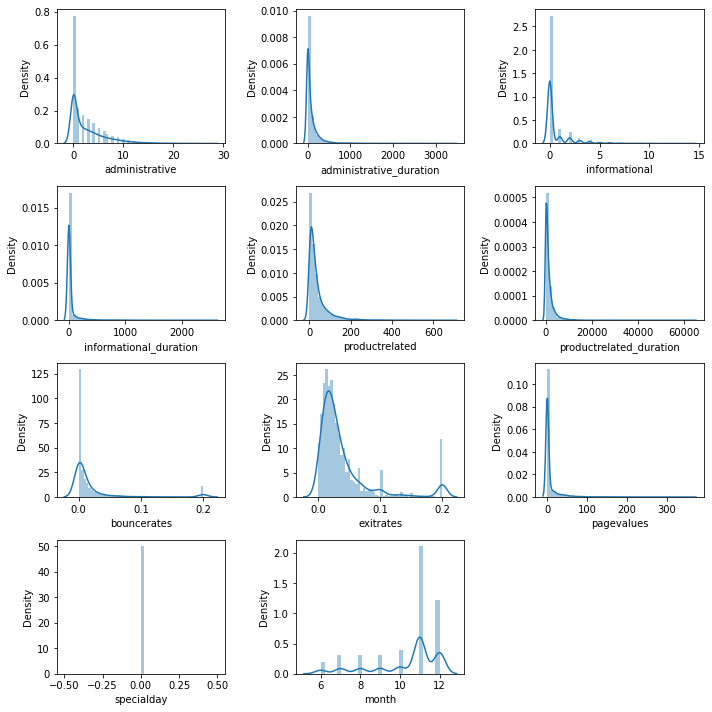

In [109]:
# Ploting Numerical Feature distributions 
print('\n Numerical Feature Analysis'.center(100))

figsize = (10, 10) 

n=len(numerical)

# histogram
plt.figure(figsize=figsize)
for i in range(len(numerical)):
    plt.subplot(4, 3 ,i+1)
    sns.distplot(train_df[numerical[i]]) 
plt.tight_layout();



## Data Preprocessing

In [110]:
# Preprocess the train and test data
X_train = train_df.drop('revenue', axis=1)
X_test = test_df.drop('revenue', axis=1)
y_train = train_df['revenue']
y_test = test_df['revenue']

In [111]:
training.shape, testing.shape

((6875, 18), (2091, 18))

## Normalizing Numerical Features

Applying a scaling to the data does not change the shape of each feature's distribution (such as 'productrelated_duration'); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning.

## One-hot encoding

One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

In [112]:
#Function to Onehot encode and Normalize the data
def data_preprocessing(X_train,X_test):
    
    """implement ohe(one hot encoding) to categorical features """
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    X_train_categorical = ohe.fit_transform(X_train[categorical])
    X_test_categorical = ohe.transform(X_test[categorical])
    new_categorical_features = list(ohe.get_feature_names_out(categorical))
    
    """ Implemenation of Normalization on numerical features"""
    scaler = MinMaxScaler()
    X_train_numerical = scaler.fit_transform(X_train[numerical])
    X_test_numerical = scaler.transform(X_test[numerical])
    
    X_train_transformed = np.hstack([X_train_numerical, X_train_categorical])
    X_test_transformed = np.hstack([X_test_numerical, X_test_categorical])
    
    return X_train_transformed, X_test_transformed, new_categorical_features

X_train, X_test, new_categorical_features = data_preprocessing(X_train, X_test)

In [113]:
# After implementing normalization and one-hot encoding - we concatenate the features
X_train_df = pd.DataFrame(X_train, columns=numerical+new_categorical_features)
X_test_df = pd.DataFrame(X_test, columns=numerical+new_categorical_features)

In [114]:
X_train_df.shape, X_test.shape

((6875, 60), (2091, 60))

## Evaluating Model Performance

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

### Logistic regression model

In [116]:
# build cross-validated predictions on a logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_pred = cross_val_predict(estimator=lr_model, X=X_train, y=y_train)

In [117]:
print('confusion matrix')
print('----------------')
print(confusion_matrix(y_train, lr_pred))
print()
print('classification report')
print('---------------------')
print(classification_report(y_train, lr_pred))

confusion matrix
----------------
[[4351 1176]
 [ 420  928]]

classification report
---------------------
              precision    recall  f1-score   support

       False       0.91      0.79      0.85      5527
        True       0.44      0.69      0.54      1348

    accuracy                           0.77      6875
   macro avg       0.68      0.74      0.69      6875
weighted avg       0.82      0.77      0.78      6875



In [118]:
lr_model.fit(X_train, y_train)
lr_pred_test = lr_model.predict(X_test)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [119]:
print('confusion matrix')
print('----------------')
print(confusion_matrix(y_test, lr_pred_test))
print()
print('classification report')
print('---------------------')
print(classification_report(y_test, lr_pred_test))

print('classification metrics')
print('----------------------')
print('accuracy:', accuracy_score(y_test, lr_pred_test))
print('precision:', precision_score(y_test, lr_pred_test))
print('recall:', recall_score(y_test, lr_pred_test))
print('f1 score:', f1_score(y_test, lr_pred_test))
print('roc score:', roc_auc_score(y_test, lr_pred_test))

confusion matrix
----------------
[[1517  379]
 [  15  180]]

classification report
---------------------
              precision    recall  f1-score   support

       False       0.99      0.80      0.89      1896
        True       0.32      0.92      0.48       195

    accuracy                           0.81      2091
   macro avg       0.66      0.86      0.68      2091
weighted avg       0.93      0.81      0.85      2091

classification metrics
----------------------
accuracy: 0.8115734098517455
precision: 0.3220035778175313
recall: 0.9230769230769231
f1 score: 0.4774535809018567
roc score: 0.8615912041544953


In [120]:
# build cross-validated predictions on a random forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_pred = cross_val_predict(estimator=rf_model, X=X_train, y=y_train)

In [121]:
print('confusion matrix')
print('----------------')
print(confusion_matrix(y_train, rf_pred))
print()
print('classification report')
print('---------------------')
print(classification_report(y_train, rf_pred))

confusion matrix
----------------
[[5313  214]
 [ 724  624]]

classification report
---------------------
              precision    recall  f1-score   support

       False       0.88      0.96      0.92      5527
        True       0.74      0.46      0.57      1348

    accuracy                           0.86      6875
   macro avg       0.81      0.71      0.74      6875
weighted avg       0.85      0.86      0.85      6875



In [122]:
# make predictions
rf_model.fit(X_train, y_train)
rf_pred_test = lr_model.predict(X_test)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [123]:
print('confusion matrix')
print('----------------')
print(confusion_matrix(y_test, rf_pred_test))
print()
print('classification report')
print('---------------------')
print(classification_report(y_test, rf_pred_test))

print('classification metrics')
print('----------------------')
print('accuracy:', accuracy_score(y_train, rf_pred))
print('precision:', precision_score(y_train, rf_pred))
print('recall:', recall_score(y_train, rf_pred))
print('f1 score:', f1_score(y_train, rf_pred))
print('roc score:', roc_auc_score(y_train, rf_pred))

confusion matrix
----------------
[[1517  379]
 [  15  180]]

classification report
---------------------
              precision    recall  f1-score   support

       False       0.99      0.80      0.89      1896
        True       0.32      0.92      0.48       195

    accuracy                           0.81      2091
   macro avg       0.66      0.86      0.68      2091
weighted avg       0.93      0.81      0.85      2091

classification metrics
----------------------
accuracy: 0.8635636363636363
precision: 0.7446300715990454
recall: 0.4629080118694362
f1 score: 0.5709057639524245
roc score: 0.712094498064264


### Feature Importance

In [124]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestRegressor()

In [125]:
rf.feature_importances_


array([3.80265347e-02, 6.39887710e-02, 1.38720649e-02, 2.59499509e-02,
       6.71674365e-02, 8.77578515e-02, 6.55343168e-02, 7.98598152e-02,
       3.56424881e-01, 0.00000000e+00, 3.67143366e-02, 4.51948724e-03,
       5.65995583e-03, 7.53157008e-04, 6.09837680e-03, 3.46826769e-03,
       2.26642622e-03, 1.31603102e-04, 1.01294679e-03, 2.20071427e-03,
       0.00000000e+00, 9.85013293e-04, 1.30463344e-04, 8.02196995e-03,
       6.54393705e-03, 6.72908515e-03, 5.83994670e-03, 2.66788499e-03,
       4.21801483e-03, 4.62135618e-03, 3.62183592e-03, 4.60818756e-03,
       6.15392715e-03, 7.82687675e-03, 4.54762934e-03, 4.27847573e-03,
       2.77579899e-03, 2.12376351e-03, 5.39282053e-04, 5.40801711e-03,
       4.45859235e-03, 2.32536284e-03, 1.77676660e-03, 0.00000000e+00,
       3.90637551e-05, 6.39635850e-04, 2.42479329e-03, 4.06339654e-03,
       5.75300221e-04, 7.14311173e-03, 5.69113890e-03, 5.66137760e-03,
       5.31634496e-03, 6.51919744e-03, 5.63690676e-03, 2.64618497e-03,
      

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 60 artists>

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

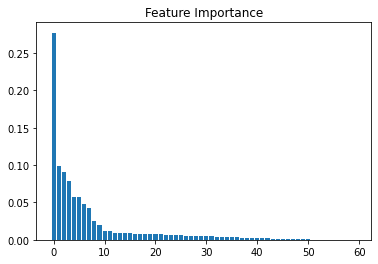

In [160]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

### NOTE : 

I had previously gotten the feature importance result and somehow when i run it again it failed. I'll kindly put my findings in the task section even though the plot failed in the above section. 

### Hyperparameter Tuning using gridsearch method

In [86]:
# grid search on some parameters
param_grid = {'max_depth': [10, 15, 20], 'max_features': ['auto', 'log2', 'sqrt'],}

gs_model = GridSearchCV(
    rf_model, 
    cv=10, 
    n_jobs=1, 
    param_grid=param_grid, 
    scoring='f1', 
    error_score='raise', 
    verbose=2
)


In [87]:
gs_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ....................max_depth=10, max_features=auto; total time=   0.6s
[CV] END ....................max_depth=10, max_features=auto; total time=   0.6s
[CV] END ....................max_depth=10, max_features=auto; total time=   0.6s
[CV] END ....................max_depth=10, max_features=auto; total time=   0.6s
[CV] END ....................max_depth=10, max_features=auto; total time=   0.6s
[CV] END ....................max_depth=10, max_features=auto; total time=   0.5s
[CV] END ....................max_depth=10, max_features=auto; total time=   0.5s
[CV] END ....................max_depth=10, max_features=auto; total time=   0.5s
[CV] END ....................max_depth=10, max_features=auto; total time=   0.5s
[CV] END ....................max_depth=10, max_features=auto; total time=   0.5s
[CV] END ....................max_depth=10, max_features=log2; total time=   0.4s
[CV] END ....................max_depth=10, max_f

GridSearchCV(cv=10, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'log2', 'sqrt']},
             scoring='f1', verbose=2)

In [89]:
# Display best estimator params
print(gs_model.best_params_)

# Display best score, params, and estimator
print(gs_model.best_score_)

{'max_depth': 10, 'max_features': 'auto'}
0.6412626086544622


## Task 1: Classification (50 points)

1. Fit a logistic regression and at least one other classification model. Find and explain important features

#### Answer : 

As per my note above regarding the plot errors out when running it agin. Here is my findings. 

By using random forest classifier to extract the features that best describe the model. We found that "pagevalues" was the most important feature for explaining a purchase. "exitrates" and "productrelated" are the next fetures that explain the outcome of a purchase. 

2. Report and interpret the most meaningful classifications metrics

#### Answer : 

By looking at the crossvalidation scores for both logistic regression and random forest models, i would say the most meaningful classification metrics is the f1 score. The reason i said that because of the fact that the dataset is imbalanced and one can't rely on metrics like accuracy. On the same note, the random forest performs better than the logistic regression  

3. Show and explain the hyper-parameter fitting process

#### Answer : 

Hyperparameter-tunning, we used grid search and focused on these parameters (i.e. max_depth, max_features) : 

- max_depth : This specifies the maximum depth to which each tree will be built. A single tree will stop splitting when there are no more splits that satisfy the min_rows parameter, if it reaches max_depth, or if there are no splits that satisfy this min_split_improvement parameter.

In general, deeper trees can seem to provide better accuracy on a training set because deeper trees can overfit your model to your data. Also, the deeper the algorithm goes, the more computing time is required. This is especially true at depths greater than 10. At depth 4, 8 nodes, for example, you need 8 * 100 * 20 trials to complete this splitting for the layer.

In our case we tuned the max_depth to avoid overfitting and have an optimal f1 score for our model 

- max_features : The way to understand Max features is "Number of features allowed to make the best split while building the tree". The reason to use this hyperparameter is, if we allow all the features for each split we are going to end up exactly the same trees in the entire random forest which might not be useful. To overcome this we let the model select a fixed number of features randomly, in this case, the no of features allowed = 'auto'. 

Having said that, by choosing these parameters we were able to increase the f1 score on the training dataset from 0.57 to 0.64 

## Task 2. Classification ( 25 points )

Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.

1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.

2. Return plots and cluster images generated for the data.

3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.).


## Data Preprocessing 

In [130]:
# Concatenating training and test sets for unsupervised learning

def unsupervised_data_preprocess(X):
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    X_cat = ohe.fit_transform(X[categorical])
    new_categorical_features = list(ohe.get_feature_names_out(categorical))
    
    scaler = MinMaxScaler()
    X_num = scaler.fit_transform(X[numerical])
    
    X_transformed = np.hstack([X_num, X_cat])
    
    return X_transformed, new_categorical_features



In [131]:
# transform the dataset (reasseble the training and testing dataset for unsupervised learning )
X = df.drop(columns='revenue')
y = df['revenue']

X_transformed, new_categorical_features = unsupervised_data_preprocess(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=numerical+new_categorical_features)


In [132]:
# dimensionality reduction
pca = PCA(n_components=10, whiten=True,random_state=42)
X_reduced = pca.fit_transform(X_transformed_df)

### Data Visualization

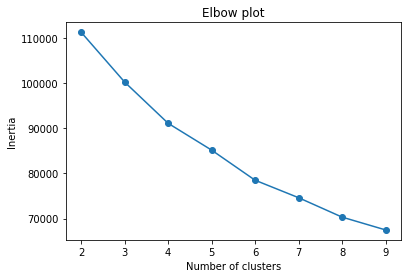

In [133]:
# 
from sklearn.cluster import KMeans
from utils import visualize_elbow
visualize_elbow(X_reduced,range(2,10))

For n_clusters = 2 The average silhouette_score is : 0.1682737003217427
For n_clusters = 3 The average silhouette_score is : 0.14424512521893582
For n_clusters = 4 The average silhouette_score is : 0.15977860990303278
For n_clusters = 5 The average silhouette_score is : 0.1475852603512179
For n_clusters = 6 The average silhouette_score is : 0.17456711527120555
For n_clusters = 7 The average silhouette_score is : 0.14338925899173716
For n_clusters = 8 The average silhouette_score is : 0.14825397885152078
For n_clusters = 9 The average silhouette_score is : 0.1466859344654719
For n_clusters = 10 The average silhouette_score is : 0.161992582133582


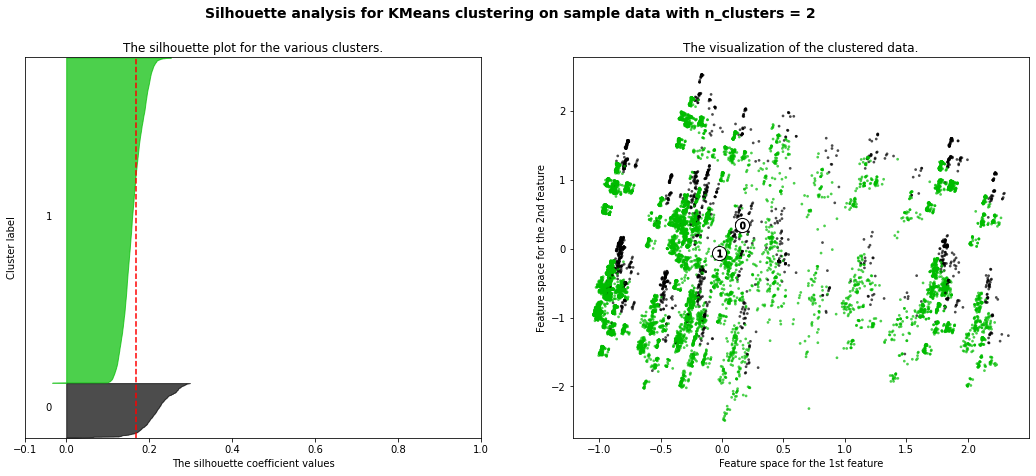

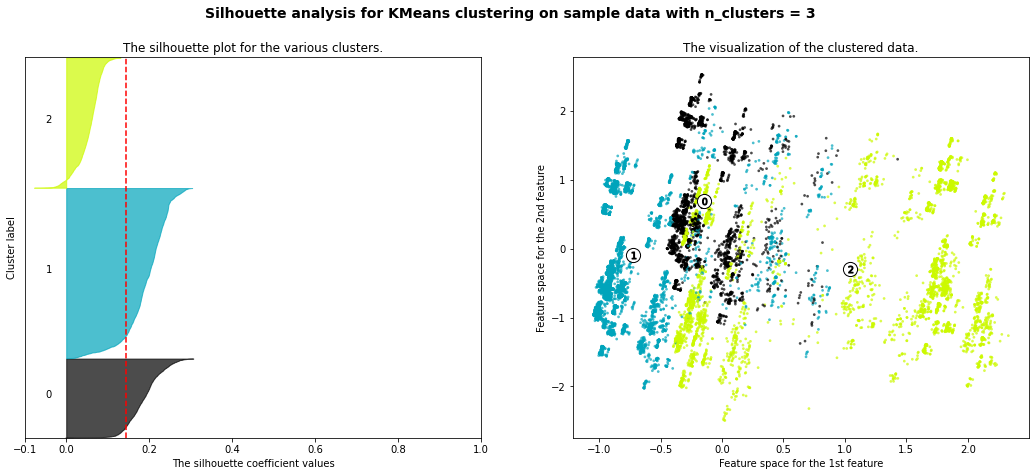

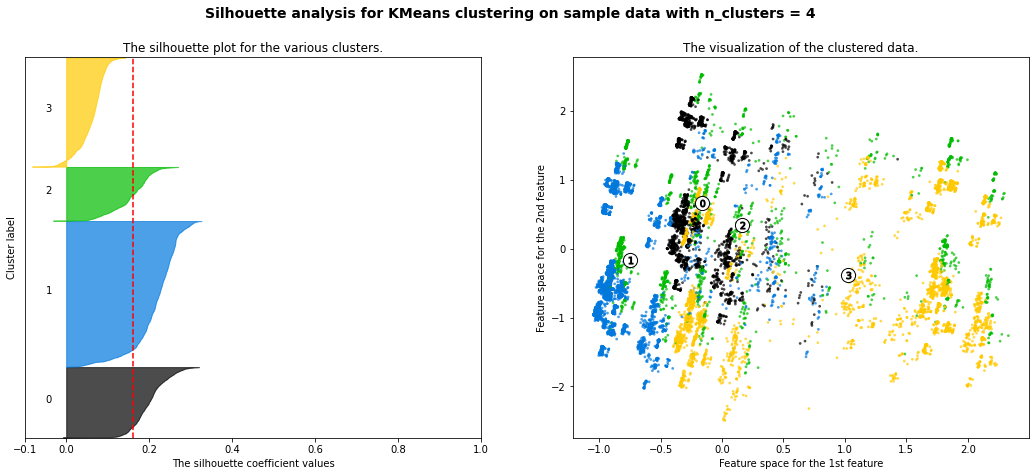

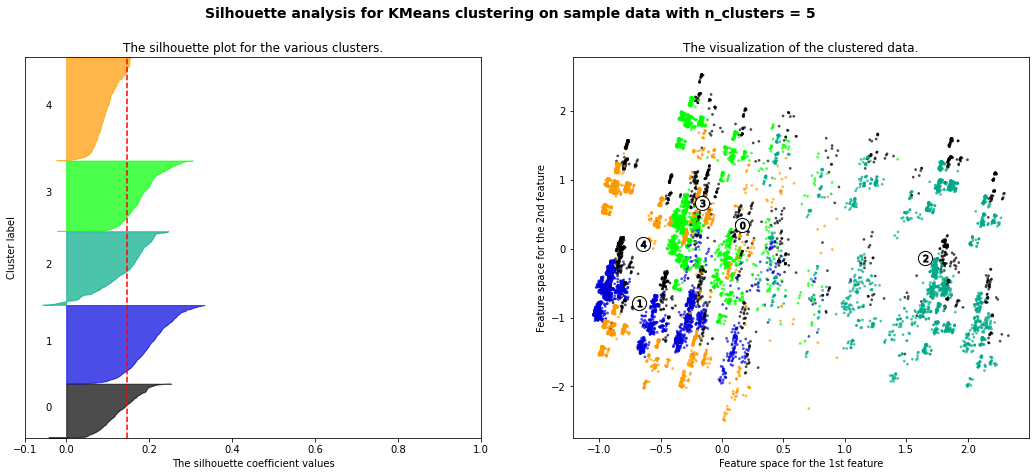

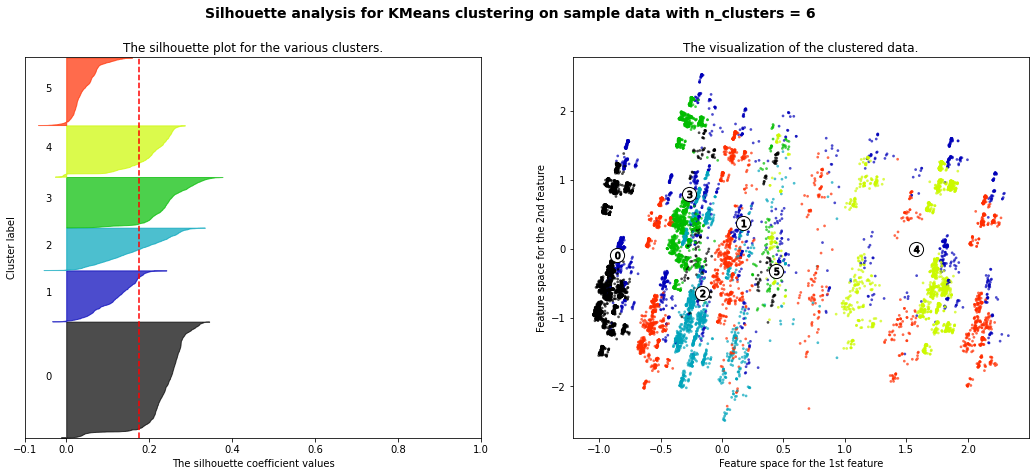

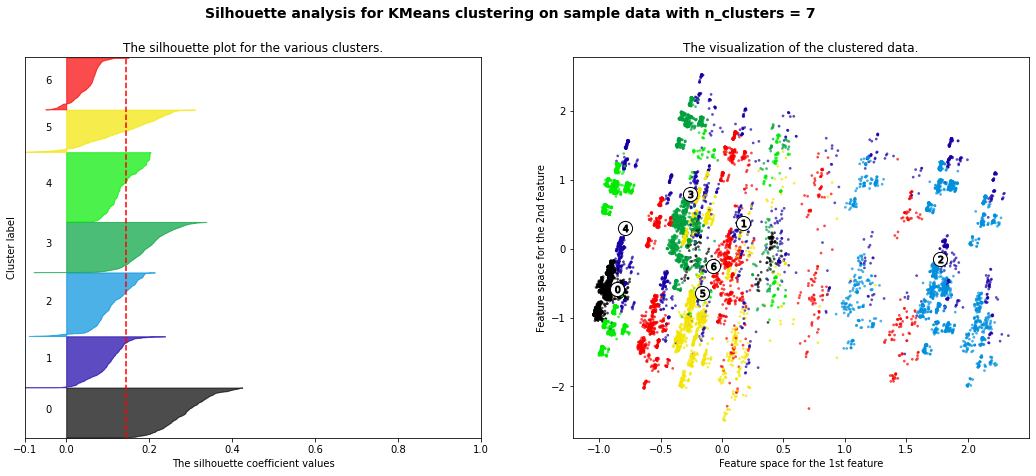

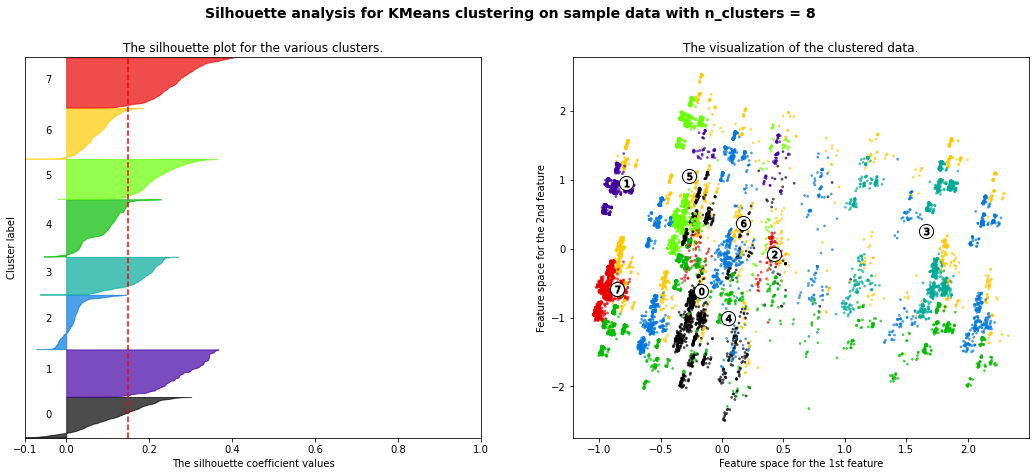

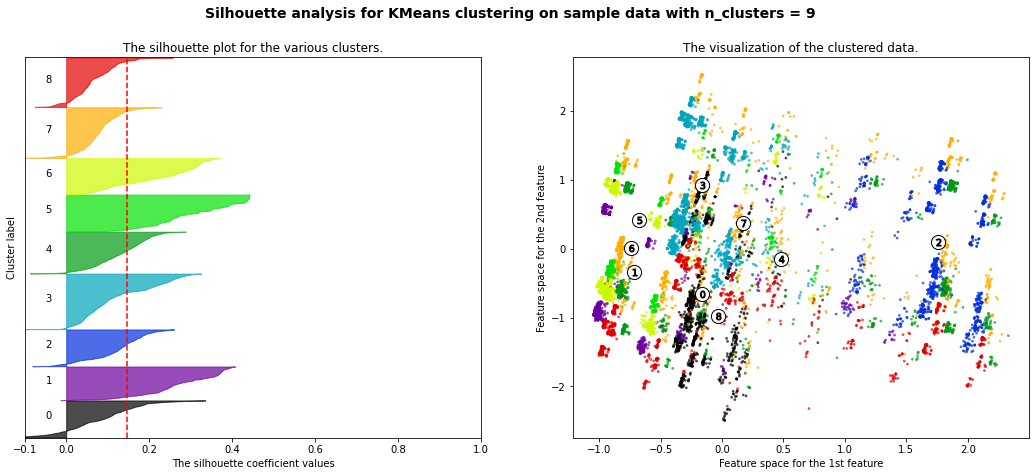

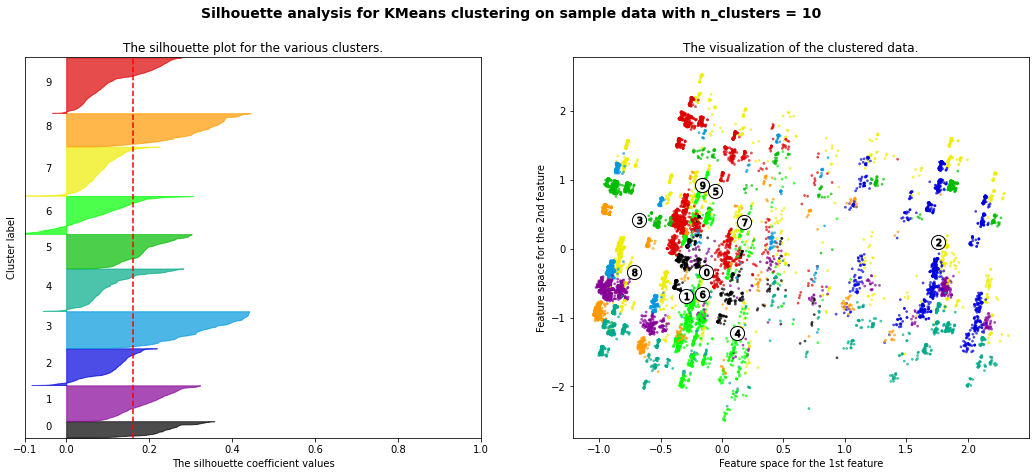

In [136]:
# visualize silhouette plots
visualize_silhouette(max_clusters=10, X=X_reduced,f1=0,f2=3)

#### Observation : 

Cluster 6 ( i.e. n_clusters = 6 ) has the highest score

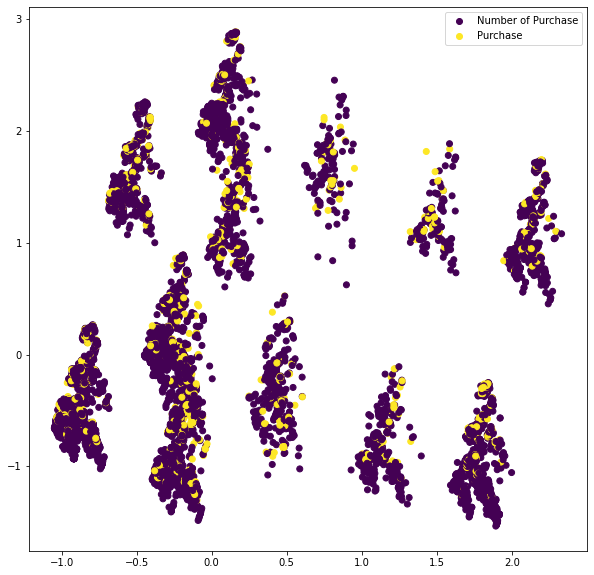

In [137]:
def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['Number of Purchase', 'Purchase'])

visualize_2pcs(X_reduced, y=y)

In [150]:
km = KMeans(n_clusters=3, random_state=10)
km.fit(X_reduced)
df['km_cluster'] = km.predict(X_reduced)

clusters_size = pd.DataFrame(kmeans.labels_, columns=['cluster']).\
    value_counts().reset_index().rename(columns={0:'size'})
clusters_size

clusters_size['%']=  clusters_size['size']/clusters_size['size'].sum()
clusters_size.sort_values(by=['cluster'], inplace=True)
clusters_size.reset_index(drop=True,inplace=True)


KMeans(n_clusters=3, random_state=10)

,cluster,size
0,0,6861
1,2,2877
2,1,2592


In [154]:
print(clusters_size)
print('\n% of visits resulting in purchase by cluster: ')
df.groupby('km_cluster')['revenue'].sum()
clusters_size['purchase']=df.groupby('km_cluster')['revenue'].sum()
clusters_size['purchase percentile'] = clusters_size['revenue']/clusters_size['size']
clusters_size


   cluster  size         %  revenue  revenue%
0        0  6861  0.556448      268  0.039061
1        1  2592  0.210219      968  0.373457
2        2  2877  0.233333      672  0.233577

% of visits resulting in purchase by cluster: 


km_cluster
0    268
1    968
2    672
Name: revenue, dtype: int64

,cluster,size,%,revenue,revenue%,purchase,purchase percentile
0,0,6861,0.556448,268,0.039061,268,0.039061
1,1,2592,0.210219,968,0.373457,968,0.373457
2,2,2877,0.233333,672,0.233577,672,0.233577


### Observation : 

Among the 3 clusters : 
- Cluster 0 is the least important clusters since only 3% of the visitors converted to purchase
- Cluster 1 is a better cluster since 37% of the visitors converted to purchase 

In [155]:
grouped_revenue = df[df['revenue']==1].groupby('km_cluster')

grouped_revenue.agg(
    SpecialDay_avg=('specialday', 'mean'), 
    PageValues_avg=('pagevalues', 'mean'), 
    unique_VisitorType=('visitortype', 'unique'),
    Admin_page_avg= ('administrative', 'mean'),
    Info_page_avg= ('informational', 'mean'),
    Prod_page_avg= ('productrelated', 'mean'),
    BounceRate_avg= ('bouncerates', 'mean'),
    OperatingSystems_unique= ('operatingsystems', 'unique')
    )

,SpecialDay_avg,PageValues_avg,unique_VisitorType,Admin_page_avg,Info_page_avg,Prod_page_avg,BounceRate_avg,OperatingSystems_unique
km_cluster,,,,,,,,
0,0.029851,18.633139,"[Returning_Visitor, New_Visitor]",4.059701,0.977612,43.682836,0.011857,[3]
1,0.023760,28.435615,"[Returning_Visitor, New_Visitor]",3.420455,0.811983,54.982438,0.003299,"[2, 1, 4, 6, 8]"
2,0.019643,29.019857,"[Returning_Visitor, New_Visitor, Other]",3.089286,0.672619,40.260417,0.005048,"[2, 1, 4, 7, 5, 8]"


### Observations : 
- Cluster 1 has the least bounce rate average
- Cluster 1 has the highest product page average

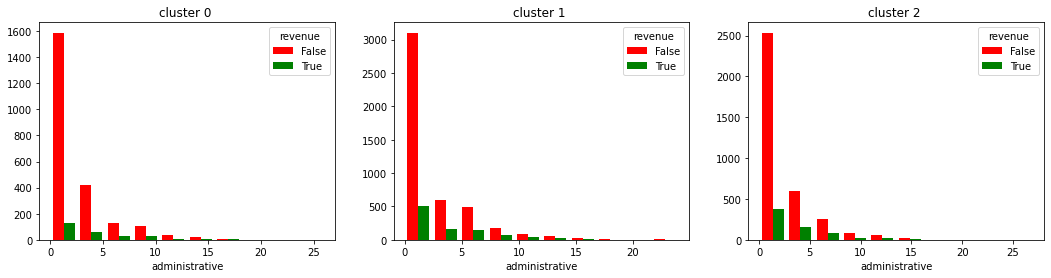

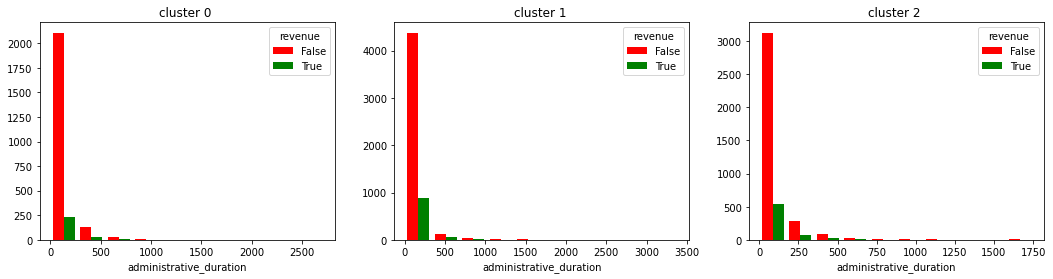

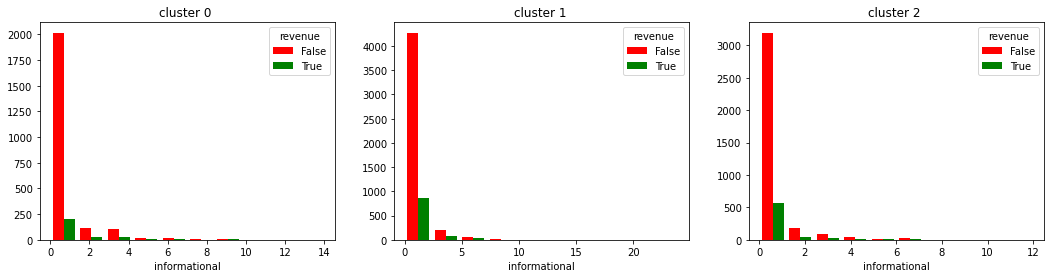

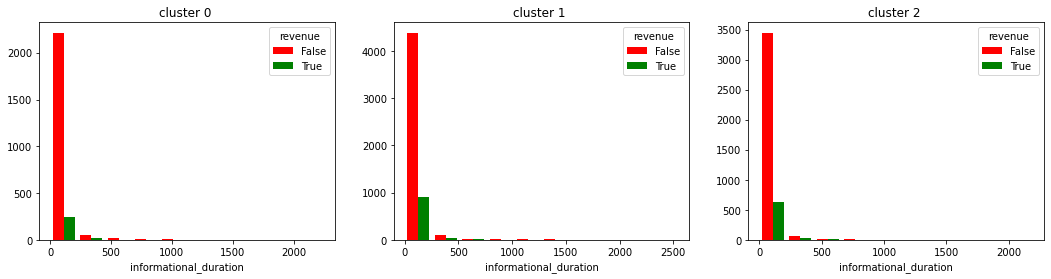

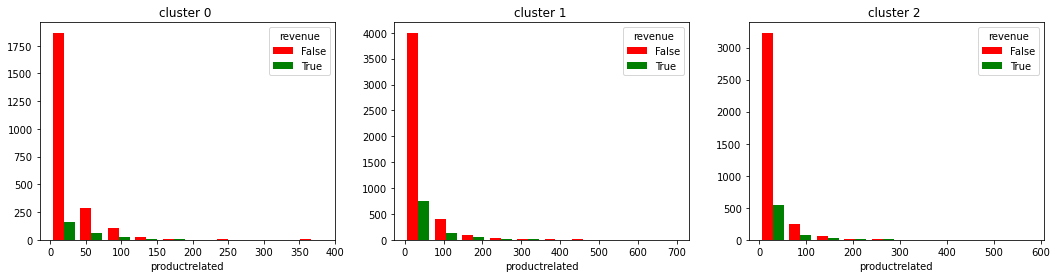

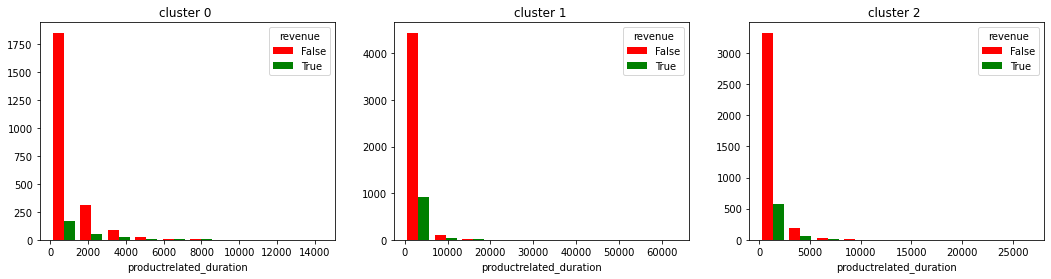

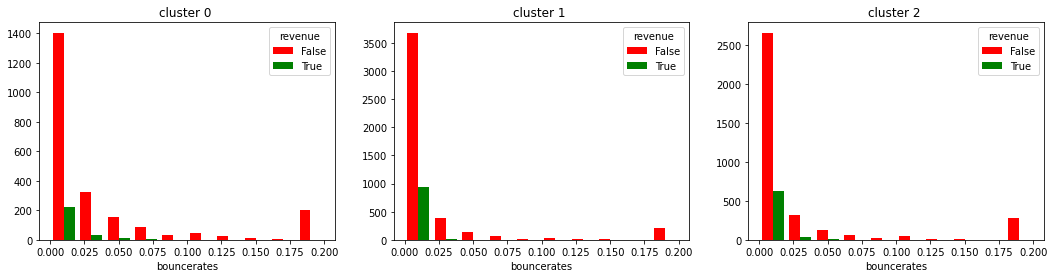

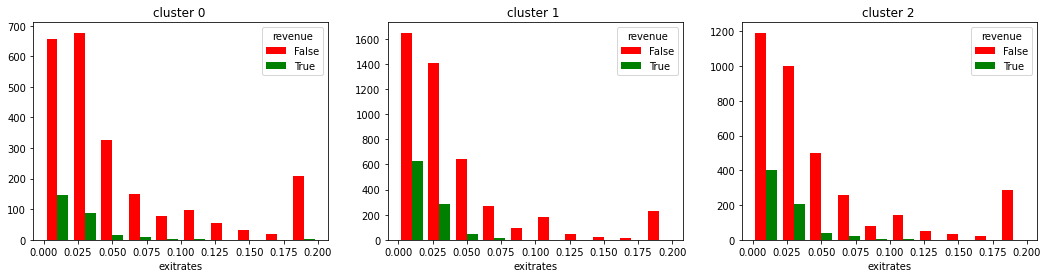

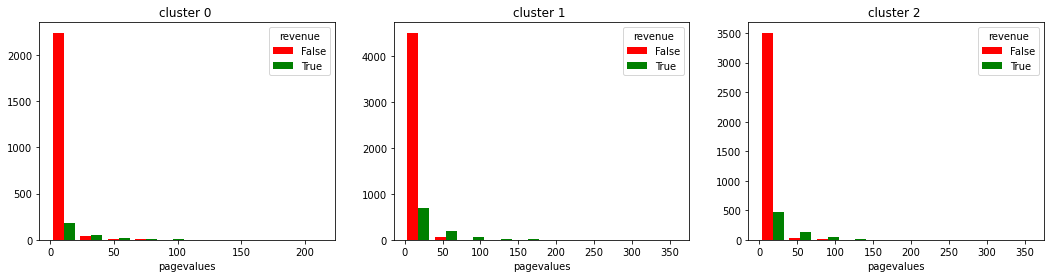

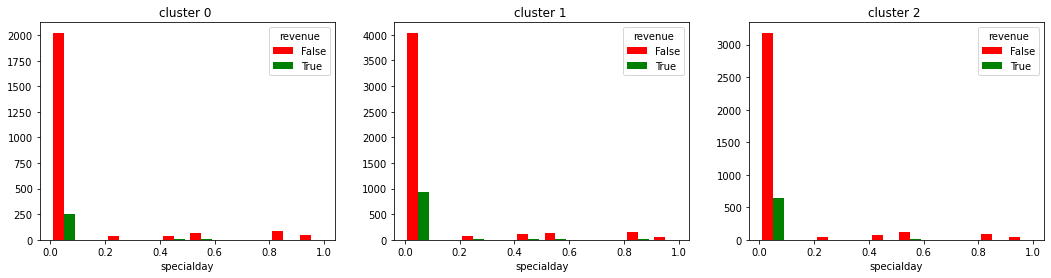

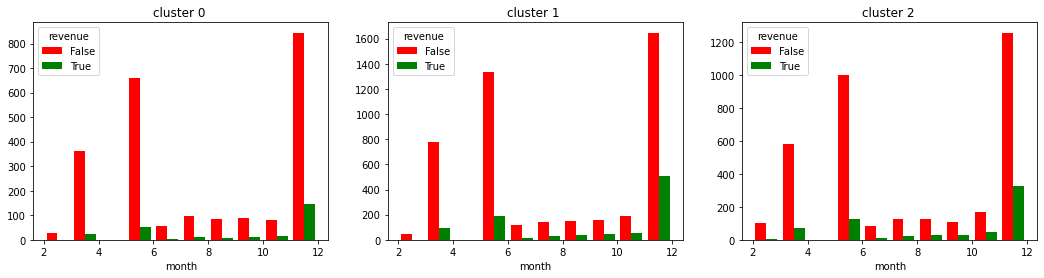

In [156]:
def plot_histogram(col, cluster_col,num_cluster,split=True):
    # if split is True, histogram will be plot by purchase
    grouped =  df.groupby(cluster_col)
    fig, axs = plt.subplots(1, num_cluster)
    fig.set_size_inches(18, 4)
    for cluster, group in grouped:
        if split:
            pivot = group.pivot(columns='revenue', values=col)
            axs[cluster].hist(pivot,color = ['r','g'])
            axs[cluster].legend(pivot.columns, title=pivot.columns.name)
        else:
            axs[cluster].hist(group[col])
        axs[cluster].set_title('cluster {} '.format(cluster))
        axs[cluster].set_xlabel(col)
    plt.show()

for col in X[numerical].columns:   
    #print(col)
    plot_histogram(col, cluster_col='km_cluster',num_cluster=3)

## Task 2 

1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.

#### Answer : 

After analyzing the silhouette plots and associated silhouette scores, we can see several cluster sizes with approximately the same silhouette score (around .14). Silhouette scores represent the "goodness" of clustering for the number of clusters, n. Given we have quite a few similary silhouette scores, we can make the case that explaining differences between a fewer number of clustered customers has easier explainability to a non-technical audience.

With 3 clusters (what our "elbow plot" and silhouette analysis recommend), we see 6861 customers in cluster 0, 2592 customers in cluster 1, and 2877 customers in cluster 2.

2. Return plots and cluster images generated for the data

#### Answer : 

Please see the plots above

3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.)

### Answer : 

- Customers in cluster 1 seems to shop mainly in the Month of November ( i.e. Thanks giving ) and December ( Chrisstmas)

## Task 3. Semi-Supervised Learning (15 points )

Consider you have training data with the Revenue attribute for records from June—September only. For all records from October—December, however, Revenue attribute is missing. Build a semi-supervised self-labeling model to estimate Revenue for the missing records in October—December and then fit your classifier. Report classification performance on February—March data set with and without the self-labeled data.

1. If you do not consider the records from October—December, generate the classification performance on test data
2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.


In [163]:
X_train_labeled = df[df['month'].isin([6,7,8,9])]
X_train_unlabeled = df[df['month'].isin([10,11,12])]

y_train_labeled = X_train_labeled.pop('revenue')
y_train_unlabeled = X_train_unlabeled.pop('revenue')

X_train = pd.concat([X_train_labeled, X_train_unlabeled])
y_train = np.concatenate((y_train_labeled, y_train_unlabeled))

X_test = df[df['month'].isin([2,3])]
y_test = X_test.pop('revenue')


In [164]:
y_train.shape, np.unique(y_train), np.unique(y_train_unlabeled), y_train_unlabeled.shape

((6875,), array([False,  True]), array([False,  True]), (5274,))

In [165]:
assert X_test.shape[0]== y_test.shape[0]
assert X_train.shape[0]== y_train.shape[0]
print('unlabeled data samples: {}; labeled data samples {}'.format(len(X_train_unlabeled),len(X_train_labeled)))

unlabeled data samples: 5274; labeled data samples 1601


### Data Preprocessing : Classification performance on test without self-labeled data

In [167]:
# without label spreading
from sklearn.metrics import classification_report

def train_classification(X_train,X_test, y_train, y_test, scale = True) -> None:
    numeric_transformer = MinMaxScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

    if scale:
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numerical),
                ("cat", categorical_transformer, categorical),
                        ]
                                        )    
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ("cat", categorical_transformer, categorial),
                        ]
                                        )    
    pipe = Pipeline(
        steps=[("preprocessor", preprocessor), ("model", LogisticRegression(class_weight='balanced'))]
                   )

    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
    
train_classification(X_train,X_test, y_train, y_test, scale=True)

              precision    recall  f1-score   support

       False       0.99      0.80      0.89      1896
        True       0.32      0.92      0.48       195

    accuracy                           0.81      2091
   macro avg       0.66      0.86      0.68      2091
weighted avg       0.93      0.81      0.85      2091



## Semi-supervised learning implementation

In [168]:
# assign -1 to y_unlabeled for semi-supervised learning.
y_train = np.concatenate((y_train_labeled, np.full(y_train_unlabeled.shape, -1))) 

In [169]:
assert y_train.shape[0]==X_train.shape[0]

In [170]:
from sklearn.semi_supervised import LabelSpreading

def train_label_spread(X,y, scale=True):
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    X_cat = ohe.fit_transform(X[categorical])
    new_cat_features = ohe.get_feature_names_out(categorical)
    
    if scale:
        scaler = MinMaxScaler()
        X_num = scaler.fit_transform(X[numerical])
    else:
        X_num = X[numerical].to_numpy()
        
    X_transformed = np.hstack([X_num, X_cat])


    label_prop_model = LabelSpreading(kernel='knn', alpha=0.01)
    label_prop_model.fit(X_transformed,y)
    semi_sup_preds = label_prop_model.transduction_[y_train_labeled.shape[0]:]
    return semi_sup_preds

In [172]:
# do the label spreading once with scaling numeric features
semi_supervised_preds = train_label_spread(X_train,y_train)    
print(classification_report(y_train_unlabeled, semi_supervised_preds)) 

              precision    recall  f1-score   support

       False       0.80      0.94      0.86      4183
        True       0.27      0.09      0.13      1091

    accuracy                           0.76      5274
   macro avg       0.54      0.51      0.50      5274
weighted avg       0.69      0.76      0.71      5274



In [173]:
semi_supervised_preds = train_label_spread(X_train,y_train, scale=False)    
print(classification_report(y_train_unlabeled, semi_supervised_preds)) 

              precision    recall  f1-score   support

       False       0.82      0.92      0.87      4183
        True       0.44      0.24      0.31      1091

    accuracy                           0.78      5274
   macro avg       0.63      0.58      0.59      5274
weighted avg       0.74      0.78      0.75      5274



### Observations : 

- Without scaling the performances in both cases is better. But with scaling it's worse
- In the classfication report below, you can see that the result is worse without the self-labeled data

In [175]:
train_classification(X_train,X_test, y_train, y_test, scale=True)

              precision    recall  f1-score   support

       False       0.99      0.32      0.49      1896
        True       0.13      0.97      0.23       195

    accuracy                           0.38      2091
   macro avg       0.56      0.65      0.36      2091
weighted avg       0.91      0.38      0.46      2091

